<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Reflections</h2>

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

We start with a very basic reflection.

<h3> Z-gate (operator) </h3>

The indentity operator $ I = \mymatrix{cc}{1 & 0 \\ 0 & 1} $ does not affect the computation.

What about the following operator?

$ Z = \Z $.

It is very similar to the identity operator.

Consider the quantum state $ \ket{u} = \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

We calculate the new quantum state after applying $ Z $ to $ \ket{u} $:

$ \ket{u'} = Z \ket{u} =  \Z  \myvector{ \frac{3}{5} \\ \frac{4}{5} } =  \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } $.

We draw both states below.

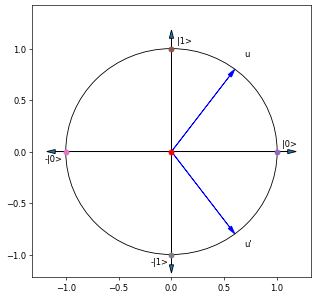

In [2]:
%run qlatvia.py

draw_qubit()

draw_quantum_state(3/5,4/5,"u")

draw_quantum_state(3/5,-4/5,"u'")

When we apply $ Z $ to the state $ \ket{u'} $, we obtain the state $\ket{u}$ again: $  \Z \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } =  \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

It is easy to see that the operator $Z$ is a reflection and its **line of reflection** is the $x$-axis.

Remark that applying the same reflection twice on the unit circle does not make any change.

<h3> Task 1 </h3>

Create a quantum circuit with 5 qubits.

Apply h-gate (Hadamard operator) to each qubit.

Apply z-gate ($Z$ operator) to randomly picked qubits. (i.e., $ mycircuit.z(qreg[i]) $)

Apply h-gate to each qubit.

Measure each qubit.

Execute your program 1000 times.

Compare the outcomes of the qubits affected by z-gates and the outcomes of the qubits not affected by z-gates.

Does z-gate change the outcome?

Why?

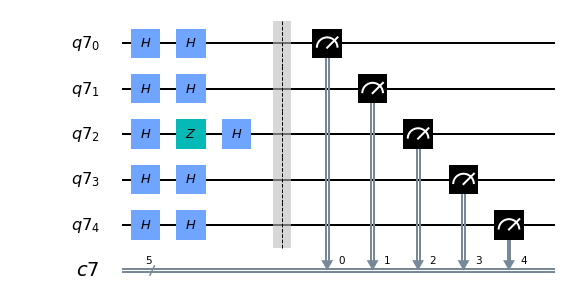

In [17]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from qiskit.visualization import plot_histogram
from random import randrange

q =  QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q,c)

# h-gate to all qubits
for i in range(5):
    qc.h(q[i])

# z-gate to randomly picked qubits
for i in range(5):
    if randrange(2) == 0:
        qc.z(q[i])
        
# h-gate to all qubits
for i in range(5):
    qc.h(q[i])
    
qc.barrier()
    
qc.measure(q,c)

qc.draw(output='mpl')

In [19]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)

print(counts)

{'00100': 1000}


[click for our solution](B44_Reflections_Solutions.ipynb#task1)

<h3> Hadamard operator </h3>

Is Hadamard operator a reflection? If so, what is its line of reflection?

Remember the following transitions.

$ H \ket{0} = \hadamard \vzero = \stateplus = \ket{+} ~~~$ and $~~~ H \ket{+} = \hadamard \stateplus = \vzero = \ket{0} $.

$ H \ket{1} = \hadamard \vzero = \stateminus = \ket{-} ~~~$ and $~~~ H \ket{-} = \hadamard \stateminus = \vone = \ket{1} $.

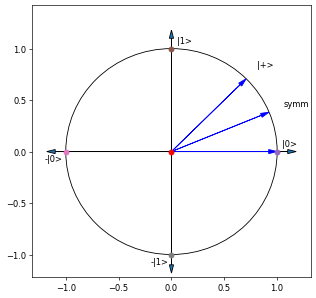

In [23]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

from math import sin, cos, pi
draw_quantum_state(cos(pi/8),sin(pi/8), "symm")# line of symmetry

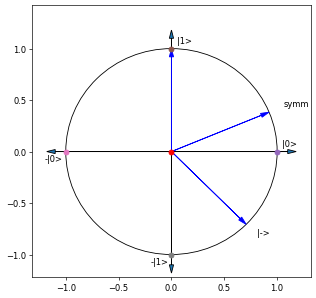

In [24]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

from math import sin, cos, pi
draw_quantum_state(cos(pi/8),sin(pi/8), "symm")# line of symmetry

<h3> Hadamard - geometrical interpretation </h3>

Hadamard operator is a reflection and its line of reflection is represented below.

It is the line obtained by rotating $x$-axis with $ \frac{\pi}{8} $ radians in counter-clockwise direction.

Text(0.21, 0.16, 'π/8')

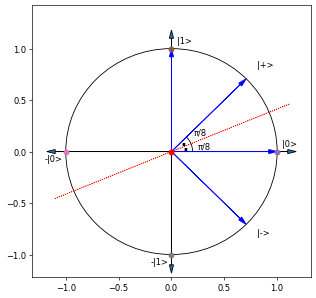

In [25]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")
draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

draw_quantum_state(0,1,"")
draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=22.5) )
text(0.09,0.015,'.',fontsize=30)
text(0.25,0.03,'\u03C0/8')
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=22.5,theta2=45) )
text(0.075,0.065,'.',fontsize=30)
text(0.21,0.16,'\u03C0/8')

<h3> Task 2 </h3>

Randomly create a quantum state and multiply it with Hadamard matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

Random quantum state:  [0.27563735581699916, 0.9612616959383189]
New quantum state:  [0.8746197071393957, -0.484809620246337]


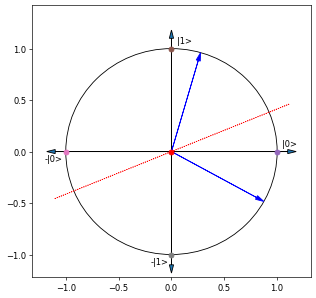

In [55]:
%run qlatvia.py

draw_qubit()

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

qs = []
for i in range(2):
    qs.append(0)
    
from random import randrange
def quantum_state():
    angle_deg = randrange(360)
    angle_rad = 2*pi*angle_deg/360
    return [cos(angle_rad), sin(angle_rad)]

qs = quantum_state()
print("Random quantum state: ", qs)
draw_quantum_state(qs[0],qs[1],"")

sqrttwo=2**0.5
H = [[1/sqrttwo, 1/sqrttwo],[1/sqrttwo, -1/sqrttwo]]
new_qs = []
for i in range(2):
    new_qs.append(0)
    
for i in range(2):
    for j in range(2):
        new_qs[i] += H[i][j]*qs[j]
        
print("New quantum state: ", new_qs)
draw_quantum_state(new_qs[0],new_qs[1],"")

[click for our solution](B44_Reflections_Solutions.ipynb#task2)

<h3> Task 3 </h3>

Find the matrix representing the reflection over the line $y=x$.

_Hint: Think about the reflections of the points $ \myrvector{0 \\ 1} $, $ \myrvector{-1 \\ 0} $, and $ \myrvector{-\sqrttwo \\ \sqrttwo} $ over the line $y=x$._

Randomly create a quantum state and multiply it with this matrix to find its reflection over the line $y = x$.

Draw both states.

Repeat the task for a few times.

Random quantum state:  [0.3583679495453004, 0.9335804264972017]
New quantum state:  [0.9335804264972017, 0.3583679495453004]


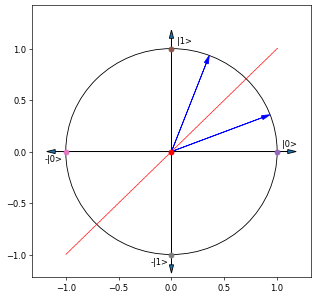

In [58]:
%run qlatvia.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

qs = []
for i in range(2):
    qs.append(0)
    
from random import randrange
def quantum_state():
    angle_deg = randrange(360)
    angle_rad = 2*pi*angle_deg/360
    return [cos(angle_rad), sin(angle_rad)]

qs = quantum_state()
print("Random quantum state: ", qs)
draw_quantum_state(qs[0],qs[1],"")

R = [[0, 1], [1, 0]]
new_qs = []
for i in range(2):
    new_qs.append(0)
    
for i in range(2):
    for j in range(2):
        new_qs[i] += R[i][j]*qs[j]
        
print("New quantum state: ", new_qs)
draw_quantum_state(new_qs[0],new_qs[1],"")

[click for our solution](B44_Reflections_Solutions.ipynb#task3)

<h3>Reflection Operators</h3>

As we have observed, the following operators are reflections on the unit circle.

<b> Z operator:</b> $ Z = \mymatrix{rr}{ 1 & 0 \\ 0 & -1 } $. The line of reflection is $x$-axis.

<b> NOT operator:</b> $ X = \mymatrix{rr}{ 0 & 1 \\ 1 & 0 } $. The line of reflection is $y=x$.

<b> Hadamard operator:</b> $ H = \hadamard $. The line of reflection is $y= \frac{\sin(\pi/8)}{\cos(\pi/8)} x$. 

It is the line passing through the origin making an angle $ \pi/8 $ radians with $x$-axis.

<b>Arbitrary reflection operator:</b> Let $ \theta $ be the angle of the line of reflection. Then, the martix form of reflection is represented as follows:

$$ Ref(\theta) = \mymatrix{rr}{ \cos(2\theta) & \sin(2\theta) \\ \sin(2\theta) & -\cos(2\theta) } . $$

<h3> Task 4 (extra) </h3>

The matrix forms of rotations and reflections are similar to each other.

Write $ Ref(\theta) $ as a combination of a basic reflection operator and rotation $ R(\theta) $.

<h3> Task 5 (extra) </h3>

Randomly pick the angle $\theta$.

Draw the line of reflection with unit circle.

Contruct the corresponding reflection matrix.

Randomly create a quantum state and multiply it with this matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

Angle value is  5 degrees
Random quantum state:  [0.19080899537654492, 0.981627183447664]
New quantum state:  [-0.8746197071393957, 0.4848096202463371]


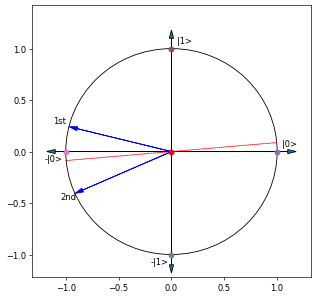

In [78]:
%run qlatvia.py

draw_qubit()

from random import randrange
from math import pi, sin, cos

angle_deg = randrange(360)
angle_rad = 2*pi*angle_deg/360

print("Angle value is ", angle_deg, "degrees")
# line of reflection 
from matplotlib.pyplot import arrow
arrow(cos(angle_rad), sin(angle_rad), 2*cos(angle_rad + pi), 2*sin(angle_rad + pi),linestyle='dotted',color='red')
    
# reflecsion matrix
Re = [[cos(2*angle_rad), sin(2*angle_rad)],[sin(2*angle_rad), -cos(2*angle_rad)]]
    
from random import randrange
def quantum_state():
    angle_deg = randrange(360)
    angle_rad = 2*pi*angle_deg/360
    return [cos(angle_rad), sin(angle_rad)]

def multiply(x,y):
    res_x = Re[0][0]*x + Re[0][1]*y
    res_y = Re[1][0]*x + Re[1][1]*y
    return [res_x,res_y]

[x,y] = quantum_state()
print("Random quantum state: ", qs)
draw_quantum_state(x,y,"1st")

[x1,y1] = multiply(x,y)

print("New quantum state: ", new_qs)
draw_quantum_state(x1,y1,"2nd")